<a href="https://colab.research.google.com/github/nishitgala89/ProjectDissertation/blob/main/Code/Data_PreProcessing/MorningStar_RemovedDuplicates_DataPreprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
dropM60=True
applyLogTransform = False

###**Mounting Google Drive**

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

### **Import Utility Files**

### Manual Upload using Colab Import files

In [3]:
# from google.colab import files
# src = list(files.upload().values())[0]
# open('morningStarUtilities.py','wb').write(src)
# import morningStarUtilities

### Import using Google Drive

In [4]:
# import sys
# path = "/content/drive/MyDrive/Colab Notebooks/Project_Dissertation"
# sys.path.insert(0,path + "/Code")
# import morningStarUtilities

### Import using Github repository

In [5]:
user = 'nishitgala89'
repo = 'ProjectDissertation'
src_dir = "Code/utilities"
pyfile = "morningStarUtilities.py"

url = f"https://raw.githubusercontent.com/{user}/{repo}/main/{src_dir}/{pyfile}"
!wget --no-cache --backups=1 {url}

--2021-11-29 13:01:24--  https://raw.githubusercontent.com/nishitgala89/ProjectDissertation/main/Code/utilities/morningStarUtilities.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6484 (6.3K) [text/plain]
Failed to rename morningStarUtilities.py to morningStarUtilities.py.1: (2) No such file or directory
Saving to: ‘morningStarUtilities.py’

morningStarUtilitie 100%[===================>]   6.33K  --.-KB/s    in 0s      

2021-11-29 13:01:24 (60.7 MB/s) - ‘morningStarUtilities.py’ saved [6484/6484]



In [6]:
import morningStarUtilities

### **Import Libraries**

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import io

### **Import Training Data**

In [8]:
# uploaded = files.upload()
# train_df = pd.read_csv(io.BytesIO(uploaded['morningstar_removedDuplicates_train_withoutM60.csv']))

In [9]:
#train_df = pd.read_csv(path + "/Data/Initial_with_Missing_Values/morningstar_removedDuplicates_train_withM60.csv").set_index("SecId")
train_df = pd.read_csv('https://raw.githubusercontent.com/nishitgala89/ProjectDissertation/main/Datasheets/2_Pre_Processing/morningstar_removedDuplicates_train_withM60.csv').set_index("SecId")

### **Import Testing Data**

In [10]:
# uploaded = files.upload()
# test_df = pd.read_csv(io.BytesIO(uploaded['morningstar_removedDuplicates_test_withoutM60.csv']))

In [11]:
#test_df = pd.read_csv(path + "/Data/Initial_with_Missing_Values/morningstar_removedDuplicates_test_withM60.csv").set_index("SecId")
test_df = pd.read_csv('https://raw.githubusercontent.com/nishitgala89/ProjectDissertation/main/Datasheets/2_Pre_Processing/morningstar_removedDuplicates_test_withM60.csv').set_index("SecId")

In [12]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 770 entries, F0GBR055SK to F000000LQ3
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Name                       770 non-null    object 
 1   StarRatingM255             770 non-null    int64  
 2   SustainabilityRank         770 non-null    int64  
 3   Yield_M12                  769 non-null    float64
 4   GBRReturnW1                770 non-null    float64
 5   GBRReturnM1                770 non-null    float64
 6   GBRReturnM3                770 non-null    float64
 7   GBRReturnM6                770 non-null    float64
 8   GBRReturnM0                770 non-null    float64
 9   GBRReturnM12               770 non-null    float64
 10  GBRReturnM36               770 non-null    float64
 11  GBRReturnM60               770 non-null    float64
 12  MaxFrontEndLoad            762 non-null    float64
 13  OngoingCostActual          766 non-null

##**Feature Engineering**

### **Part 1 - Converting the TrackRecordExtension in the morningstar dataframe to int from Boolean value**

In [13]:
train_df.TrackRecordExtension.value_counts()

False    589
True     181
Name: TrackRecordExtension, dtype: int64

In [14]:
test_df.TrackRecordExtension.value_counts()

False    197
True      59
Name: TrackRecordExtension, dtype: int64

In [15]:
train_df.TrackRecordExtension = train_df.TrackRecordExtension.astype(int)
test_df.TrackRecordExtension = test_df.TrackRecordExtension.astype(int)

### **Part 2 -Adding new features of Size and Style corresponding to Equity Style box of Morningstar as shown**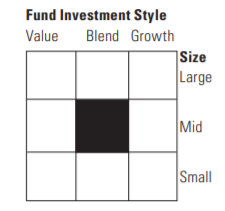

#### As per above image, we can derive below 2 new features Investment_Style, Size
Note- 
1. Investment_Style (Value, Blend,Growth) will be represented as (1,2,3)
1.  Size (Large,Mid,Small) will be represented as (1,2,3)

* EquityStyleBox = 1, InvestmentStyle - 1, Size - 1 
* EquityStyleBox = 2, InvestmentStyle - 2, Size - 1
* EquityStyleBox = 3, InvestmentStyle - 3, Size - 1
* EquityStyleBox = 4, InvestmentStyle - 1, Size - 2
* EquityStyleBox = 5, InvestmentStyle - 2, Size - 2
* EquityStyleBox = 6, InvestmentStyle - 3, Size - 2
* EquityStyleBox = 7, InvestmentStyle - 1, Size - 3
* EquityStyleBox = 8, InvestmentStyle - 2, Size - 3
* EquityStyleBox = 9, InvestmentStyle - 3, Size - 3#

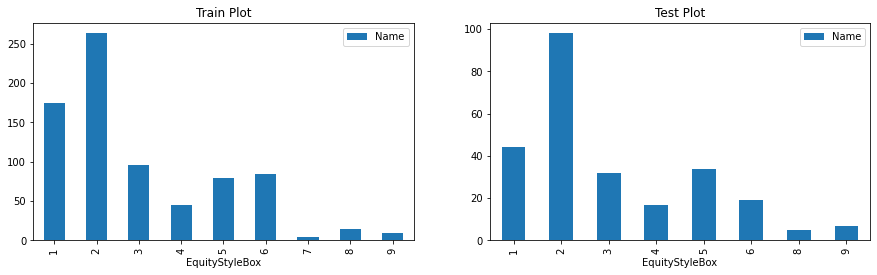

In [16]:
morningStarUtilities.displayBarSubPlots([train_df,test_df],["Train Plot", "Test Plot"],
                                        "EquityStyleBox")

In [17]:
train_df = morningStarUtilities.createSize_InvestmentTypeFeature(train_df)
test_df = morningStarUtilities.createSize_InvestmentTypeFeature(test_df)

In [18]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 770 entries, F0GBR055SK to F000000LQ3
Data columns (total 36 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Name                       770 non-null    object 
 1   StarRatingM255             770 non-null    int64  
 2   SustainabilityRank         770 non-null    int64  
 3   Yield_M12                  769 non-null    float64
 4   GBRReturnW1                770 non-null    float64
 5   GBRReturnM1                770 non-null    float64
 6   GBRReturnM3                770 non-null    float64
 7   GBRReturnM6                770 non-null    float64
 8   GBRReturnM0                770 non-null    float64
 9   GBRReturnM12               770 non-null    float64
 10  GBRReturnM36               770 non-null    float64
 11  GBRReturnM60               770 non-null    float64
 12  MaxFrontEndLoad            762 non-null    float64
 13  OngoingCostActual          766 non-null

In [19]:
train_df[['StarRatingM255','EquityStyleBox','Size','Style']].corr()

,StarRatingM255,EquityStyleBox,Size,Style
StarRatingM255,1.000000,0.052115,-0.064471,0.281340
EquityStyleBox,0.052115,1.000000,0.928144,0.553436
Size,-0.064471,0.928144,1.000000,0.203649
Style,0.281340,0.553436,0.203649,1.000000


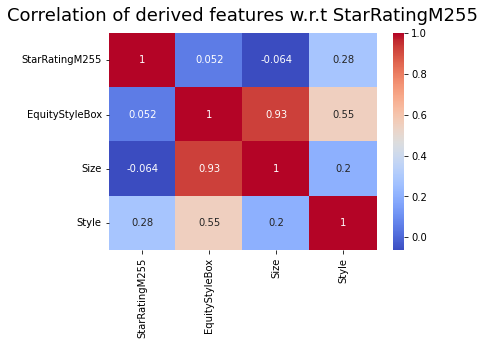

In [20]:
hmap = sns.heatmap(train_df[['StarRatingM255','EquityStyleBox','Size','Style']].corr(), cmap="coolwarm", annot=True)
hmap.set_title("Correlation of derived features w.r.t StarRatingM255", fontdict={'fontsize':18}, pad=12);

In [21]:
train_df.drop(columns="EquityStyleBox",inplace=True)
test_df.drop(columns="EquityStyleBox",inplace=True)

### **Part 3 -Check Missing Values**

In [22]:
featureLst = ['StarRatingM255','Size','Style','MorningstarRiskM255','SustainabilityRank']

In [23]:
morningStarUtilities.checkNullValues(train_df)

MaxFrontEndLoad         8
FundTNAV                4
TransactionFeeActual    4
OngoingCostActual       4
Yield_M12               1
dtype: int64

In [24]:
null_cols = morningStarUtilities.checkNullValues(train_df)
null_df = pd.DataFrame(null_cols)
null_col_list = null_df.index.to_list()

## **Replace Missing Values**

### **1) MaxFrontEndLoad**

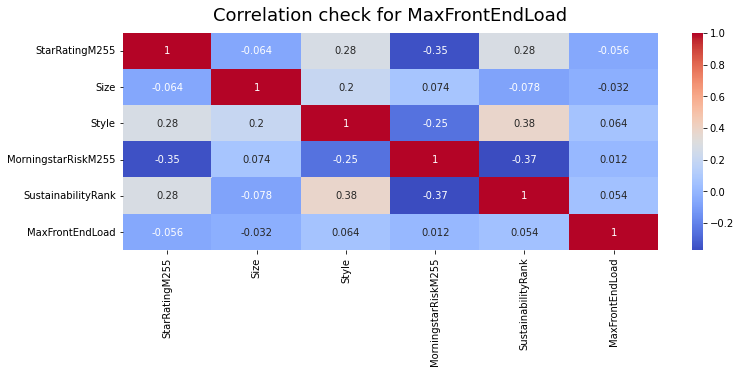

In [25]:
if "MaxFrontEndLoad" in null_col_list:
  morningStarUtilities.displayCorrelationMatrixAsPerFeatureList(train_df,featureLst,"MaxFrontEndLoad"
                                                              ,"Correlation check for MaxFrontEndLoad")
  

#### **Since we dont see good correlation with the columns, we will check the bar plot to replace missing values**

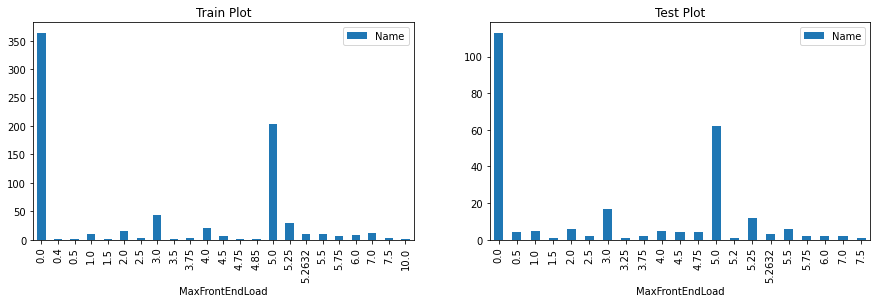

In [26]:
morningStarUtilities.displayBarSubPlots([train_df,test_df],["Train Plot", "Test Plot"],
                   "MaxFrontEndLoad")

#### **Replace the missing values with mean of the field for training and testing**

In [27]:
train_df['MaxFrontEndLoad'].fillna(round(train_df['MaxFrontEndLoad'].mean(),2), inplace=True)
test_df['MaxFrontEndLoad'].fillna(round(test_df['MaxFrontEndLoad'].mean(),2), inplace=True) 

### **2) OngoingCostActual**

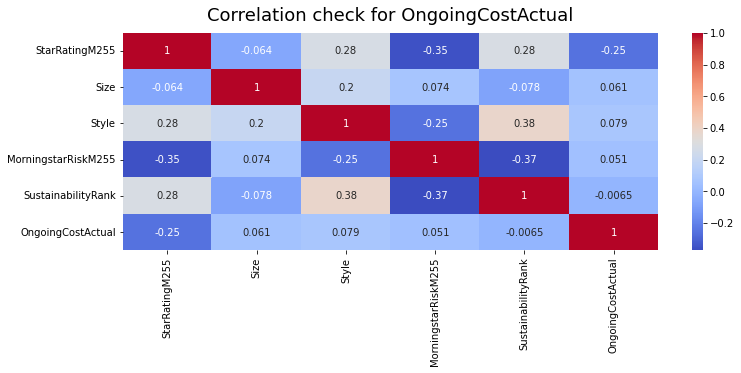

In [28]:
if "OngoingCostActual" in null_col_list:
  morningStarUtilities.displayCorrelationMatrixAsPerFeatureList(train_df,featureLst,
                                                                "OngoingCostActual"
                                                              ,"Correlation check for OngoingCostActual")
  

#### **Plotting the box plot to check on outliers wrt StarRatingM255**

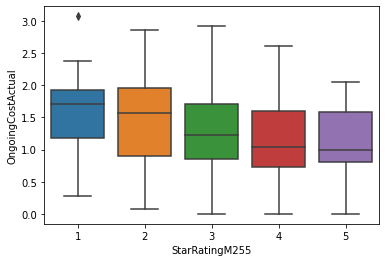

In [29]:
if "OngoingCostActual" in null_col_list:
  sns.boxplot(x="StarRatingM255", y="OngoingCostActual", data=train_df)

#### **Filling the missing values with mean wrt StarRatingM255**

In [30]:
train_df['OngoingCostActual'] = train_df.groupby('StarRatingM255')['OngoingCostActual'].transform(lambda grp: grp.fillna(round(np.mean(grp),1)))
test_df['OngoingCostActual'] = test_df.groupby('StarRatingM255')['OngoingCostActual'].transform(lambda grp: grp.fillna(round(np.mean(grp),1)))

### **3) TransactionFeeActual**

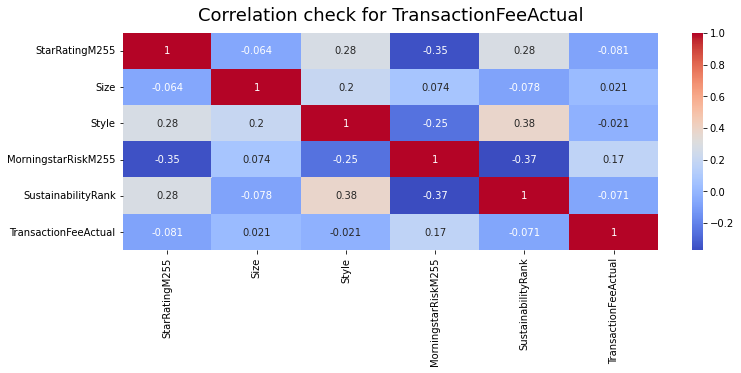

In [31]:
if "TransactionFeeActual" in null_col_list:
  morningStarUtilities.displayCorrelationMatrixAsPerFeatureList(train_df,featureLst,
                                                                "TransactionFeeActual",
                                                                "Correlation check for TransactionFeeActual")
  

#### **Plotting the Box plot wrt MorningstarRiskM255 to check outliers**

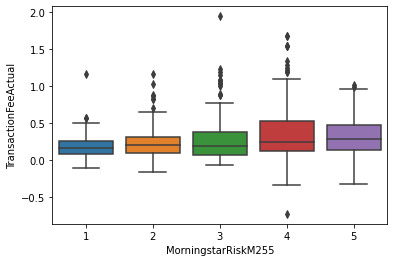

In [32]:
if "TransactionFeeActual" in null_col_list:
  sns.boxplot(x="MorningstarRiskM255",y="TransactionFeeActual",data=train_df)

#### **Filling the missing values with median wrt MorningstarRiskM255**

In [33]:
train_df = morningStarUtilities.replaceMisValUsingGroupMedian(train_df,
                                                              'MorningstarRiskM255',
                                                              'TransactionFeeActual')
test_df = morningStarUtilities.replaceMisValUsingGroupMedian(test_df,
                                                             'MorningstarRiskM255',
                                                             'TransactionFeeActual')


### **4) FundTNAV**

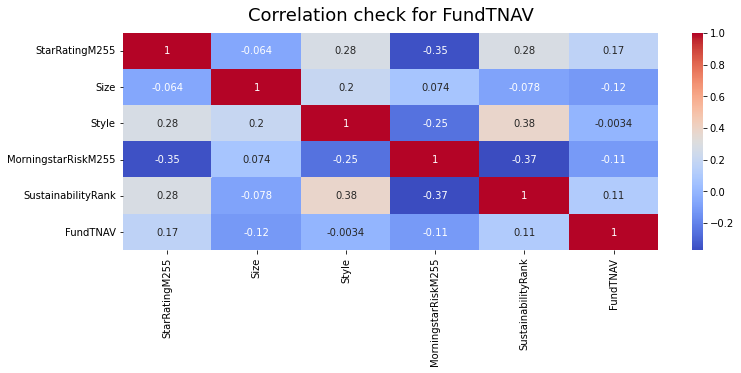

In [34]:
if "FundTNAV" in null_col_list:
  morningStarUtilities.displayCorrelationMatrixAsPerFeatureList(train_df,featureLst,
                                                                "FundTNAV",
                                                                "Correlation check for FundTNAV")
  

#### **Plotting the boxplot wrt StarRatingM255**

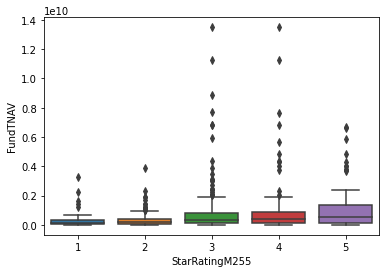

In [35]:
if "FundTNAV" in null_col_list:
  sns.boxplot(x="StarRatingM255", y="FundTNAV", data=train_df)

#### **Since we have outliers wrt StarRatingM255, we will replace missing values with median**

In [36]:
train_df = morningStarUtilities.replaceMisValUsingGroupMedian(train_df,
                                                              'StarRatingM255',
                                                              'FundTNAV')
test_df = morningStarUtilities.replaceMisValUsingGroupMedian(test_df,
                                                             'StarRatingM255',
                                                             'FundTNAV')

### **5) ReturnProfileHedging**

In [37]:
test_df_cpy = test_df.copy()
test_df_cpy['ReturnProfileHedging'].fillna(0) # 0 is misssing

SecId
F00000UP2V    2.0
F0GBR06C3N    2.0
F000000216    3.0
F0GBR04SH0    3.0
F0GBR04SQV    3.0
             ... 
F0000000Y6    3.0
F0GBR052TR    3.0
F0GBR04E5D    3.0
F0000001U8    2.0
F00000W0H4    2.0
Name: ReturnProfileHedging, Length: 256, dtype: float64

In [38]:
test_df_cpy.ReturnProfileHedging.value_counts()

3.0    203
2.0     50
1.0      2
Name: ReturnProfileHedging, dtype: int64

Text(0.5, 1.0, 'Testing Data')

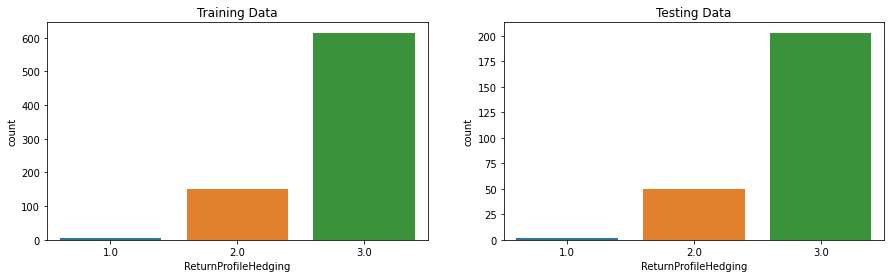

In [39]:
fig,ax = plt.subplots(1,2,figsize=(15,4))
sns.countplot(x='ReturnProfileHedging', data = train_df, ax=ax[0])
sns.countplot(x='ReturnProfileHedging', data = test_df_cpy, ax=ax[1])
ax[0].set_title("Training Data")
ax[1].set_title("Testing Data")


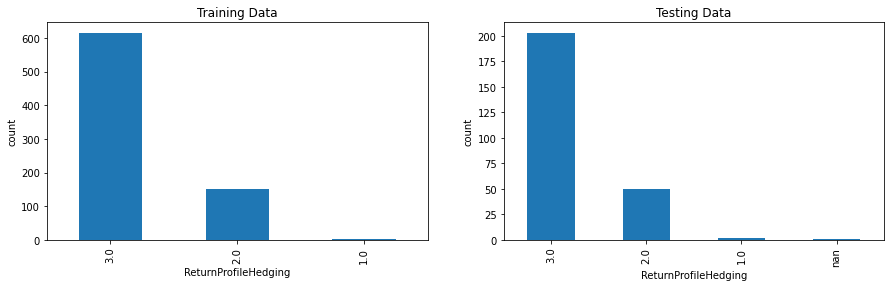

In [40]:
fig,ax = plt.subplots(1,2,figsize=(15,4))
train_df.ReturnProfileHedging.value_counts(dropna=False).plot(ax=ax[0],kind='bar',xlabel = 'ReturnProfileHedging', ylabel='count', title='Training Data');
test_df.ReturnProfileHedging.value_counts(dropna=False).plot(ax=ax[1],kind='bar', xlabel = 'ReturnProfileHedging', ylabel='count', title = 'Testing Data');


#### **Replace missing values with mode**

In [41]:
train_df['ReturnProfileHedging'] = train_df['ReturnProfileHedging'].fillna(3)

### **6) AverageMarketCapital**

In [42]:
if "AverageMarketCapital" in null_col_list:
  morningStarUtilities.displayCorrelationMatrixAsPerFeatureList(train_df,featureLst,
                                                                "AverageMarketCapital",
                                                                "Correlation check for FundTNAV")
  

#### **Checking Outliers wrt Size feature using Boxplot**

In [43]:
if "AverageMarketCapital" in null_col_list:
  sns.boxplot(x="Size", y="AverageMarketCapital", data=train_df)

#### **Since we have outliers wrt Size, we will replace missing values with median**

In [44]:
train_df = morningStarUtilities.replaceMisValUsingGroupMedian(train_df,
                                                              'Size',
                                                              'AverageMarketCapital')
test_df = morningStarUtilities.replaceMisValUsingGroupMedian(test_df,
                                                             'Size','AverageMarketCapital')

### **7) Yield_M12**

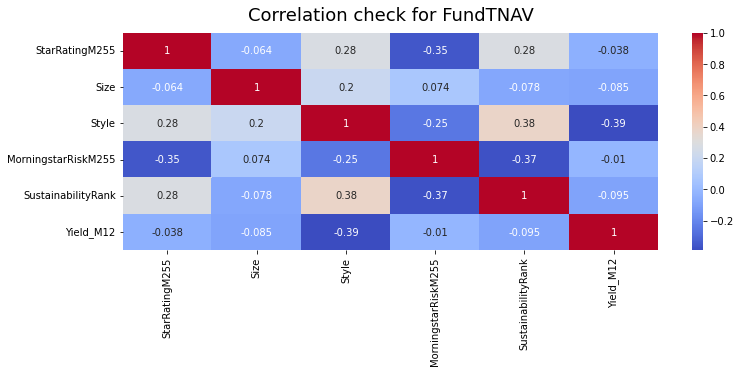

In [45]:
if "Yield_M12" in null_col_list:
  morningStarUtilities.displayCorrelationMatrixAsPerFeatureList(train_df,featureLst,
                                                                "Yield_M12",
                                                                "Correlation check for FundTNAV")
  

#### **Checking the missing value**

In [46]:
train_df[train_df.Yield_M12.isnull()][['Style']]

,Style
SecId,
F00000WMDY,3


In [47]:
test_df[test_df.Yield_M12.isnull()][['Style']]

,Style
SecId,


#### **Checking Boxplot wrt Style**

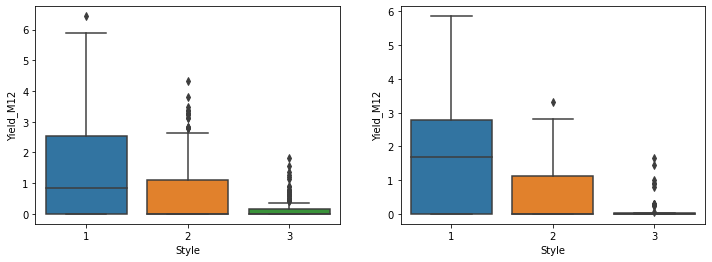

In [48]:
fig,ax=plt.subplots(1,2,figsize=(12,4))
if "Yield_M12" in null_col_list:
  sns.boxplot(x="Style", y="Yield_M12", data=train_df,ax=ax[0])
  sns.boxplot(x="Style", y="Yield_M12", data=test_df,ax=ax[1])

In [49]:
tmpdf = pd.DataFrame(train_df[train_df.Style == 3]['Yield_M12'])
tmpdf[tmpdf.Yield_M12 == 0].value_counts(), len(tmpdf)

(Yield_M12
 0.0          136
 dtype: int64, 190)

In [50]:
tmpdf = pd.DataFrame(test_df[test_df.Style == 3]['Yield_M12'])
tmpdf[tmpdf.Yield_M12 == 0].value_counts(), len(tmpdf)

(Yield_M12
 0.0          43
 dtype: int64, 58)

#### **Since the Missing value style is 3, and majority of the data for Yield_M12 is 0, replacing the value with mode**

In [51]:
train_df.Yield_M12.fillna(0,inplace=True)
test_df.Yield_M12.fillna(0,inplace=True)

### **8) Manager Tenure**

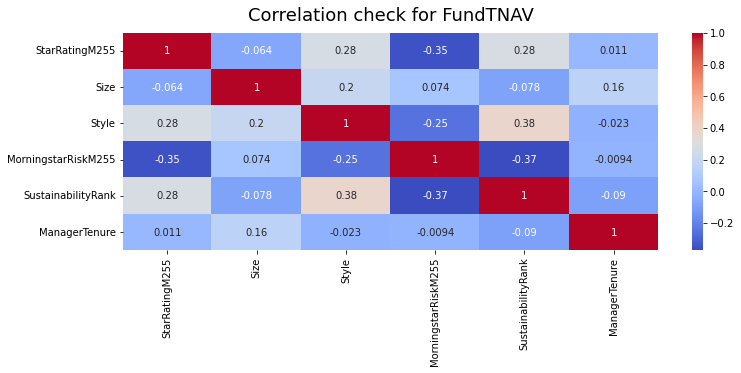

In [52]:
#if "ManagerTenure" in null_col_list:
morningStarUtilities.displayCorrelationMatrixAsPerFeatureList(train_df,featureLst,
                                                                "ManagerTenure",
                                                                "Correlation check for FundTNAV")
  

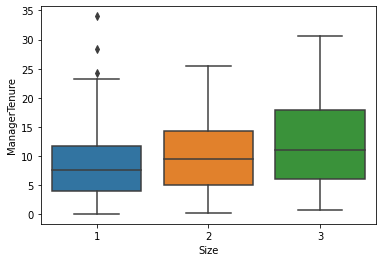

In [53]:
sns.boxplot(data=train_df,x='Size',y='ManagerTenure')

#### **Replacing missing values using Median**

In [54]:
train_df = morningStarUtilities.replaceMisValUsingGroupMedian(train_df,
                                                              'Size',
                                                              'ManagerTenure')
test_df = morningStarUtilities.replaceMisValUsingGroupMedian(test_df,
                                                             'Size','ManagerTenure')

## **Verifying that there is no missing values in training and testing set**

In [55]:
morningStarUtilities.checkNullValues(train_df)

Series([], dtype: float64)

In [56]:
morningStarUtilities.checkNullValues(test_df)

ReturnProfileHedging    1
dtype: int64

## **Feature Transformation**

### **Applying the Logarithmic transformation on columns with positive and negative values**

In [57]:
lst =['TrackRecordExtension','Cat_Flex-Cap','Cat_Income','Cat_Large-Cap'
        ,'Cat_Mid_Small-Cap','Cat_Miscellaneous']
num_cols =[col for col in train_df.columns if train_df[col].dtype in ('float64','int64')]
num_cols.remove('StarRatingM255')
num_cols =[col for col in num_cols if col not in lst]

In [58]:
if applyLogTransform:
  train_df = morningStarUtilities.applyLogTransformation(train_df,num_cols)
  test_df = morningStarUtilities.applyLogTransformation(test_df,num_cols)

## **Saving the Sheet as Final Version**

In [59]:
if applyLogTransform:
  if dropM60:
    train_df.to_csv("morningstar_removedDuplicates_train_withLogTransform_withoutM60.csv",index="SecId")
    test_df.to_csv("morningstar_removedDuplicates_test_withLogTransform_withoutM60.csv",index="SecId")
  else:
    train_df.to_csv("morningstar_removedDuplicates_train_withLogTransform_withM60.csv",index="SecId")
    test_df.to_csv("morningstar_removedDuplicates_test_withLogTransform_withM60.csv",index="SecId")
else:
  if dropM60:
    train_df.to_csv("morningstar_removedDuplicates_train_withoutLogTransform_withoutM60.csv",index="SecId")
    test_df.to_csv("morningstar_removedDuplicates_test_withoutLogTransform_withoutM60.csv",index="SecId")
  else:
    train_df.to_csv("morningstar_removedDuplicates_train_withoutLogTransform_withM60.csv",index="SecId")
    test_df.to_csv("morningstar_removedDuplicates_test_withoutLogTransform_withM60.csv",index="SecId")